# Symulacja Central Theorem Limit (CTL)


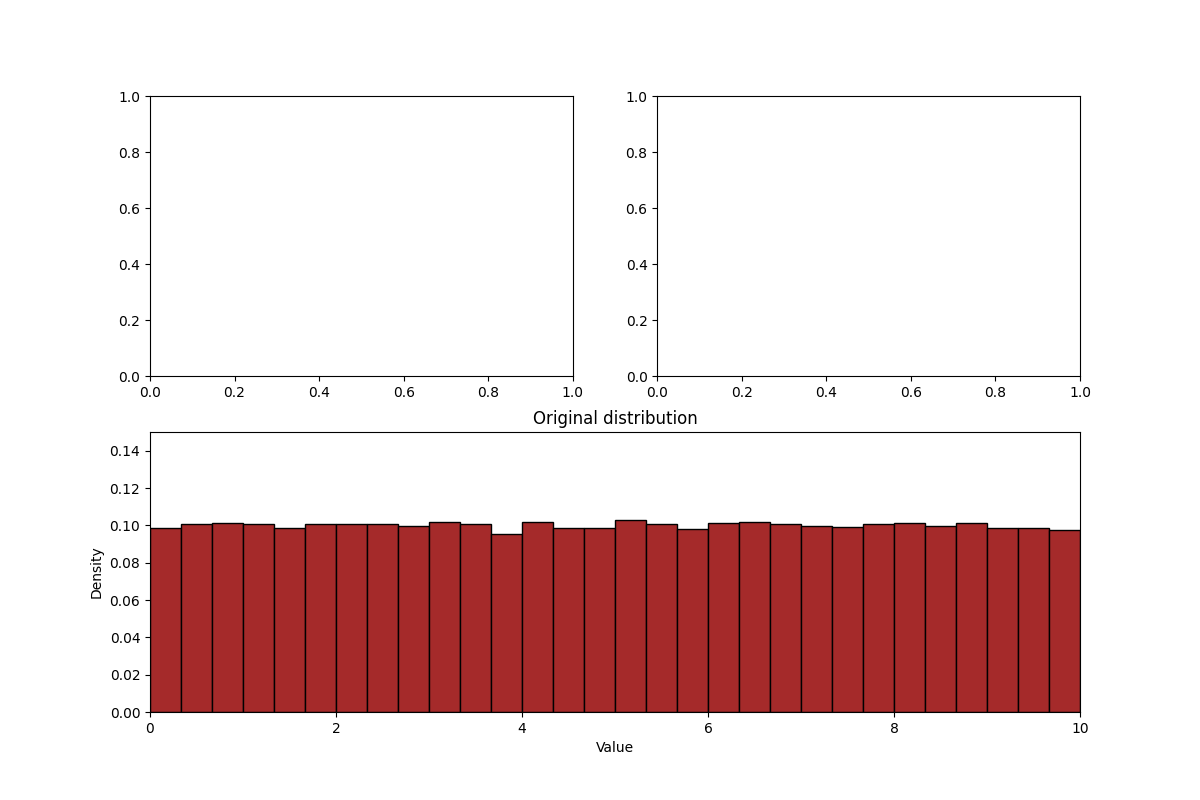

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.stats import norm


np.random.seed(42)
sample_size = 30
num_samples = 200

original_distribution = np.random.uniform(0.0, 10.0, 100000)

sample_means = []

fig, axes = plt.subplot_mosaic([
        ["sample", "sample_mean"],
        ["original", "original"]
    ],
    figsize=(12, 8)
)

ax_sample = axes["sample"]
ax_mean = axes["sample_mean"]
ax_original = axes["original"]

ax_original.hist(original_distribution, color="brown", bins=30, range=(0,10), density=True, edgecolor="black")
ax_original.set_title("Original distribution")
ax_original.set_xlim(0, 10)
ax_original.set_ylim(0, 0.15)
ax_original.set_xlabel("Value")
ax_original.set_ylabel("Density")


def update(frame):
    current_sample = np.random.choice(original_distribution, size=sample_size)
    sample_means.append(np.mean(current_sample))

    ax_mean.clear()
    ax_mean.hist(sample_means, color="pink", bins=30, range=(0,10), density=True, edgecolor="black", alpha=0.7)
    ax_mean.set_title(f"Mean average for samples ({len(sample_means)}/{num_samples})")
    ax_mean.set_xlim(0, 10)
    ax_mean.set_ylim(0, 1)
    ax_mean.set_xlabel("Value")
    ax_mean.set_ylabel("Density")

    if len(sample_means) > 1:
        mu, std = np.mean(sample_means), np.std(sample_means)
        x = np.linspace(0, 10, 500)
        p = norm.pdf(x, mu, std)
        ax_mean.plot(x, p, 'b--', linewidth=2, label=f"N({mu:.2f}, {std:.2f})")
        ax_mean.fill_between(x, p, alpha=.2, color='blue')
        ax_mean.legend()

        ax_mean.annotate(
            f"Mean: {mu:.2f}\nStd: {std:.2f}",
            xy=(mu, norm.pdf(mu, mu, std)),
            xytext=(mu + 0.75, 0.7),
            arrowprops=dict(facecolor='black', arrowstyle="simple"),
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
        )

    ax_sample.clear()
    ax_sample.hist(current_sample, color="lightblue", bins=15, range=(0,10), density=True, edgecolor="black", alpha=0.7)
    ax_sample.set_title(f"Random sample")
    ax_sample.set_xlim(0, 10)
    ax_sample.set_ylim(0, 1)
    ax_sample.set_xlabel("Value")
    ax_sample.set_ylabel("Density")

    current_mean = np.mean(current_sample)
    ax_sample.axvline(current_mean, color='blue', linestyle="--", linewidth=2)
    ax_sample.annotate(
        f"Mean: {current_mean:.2f}",
        xy=(current_mean, 0.8),
        xytext=(current_mean + 0.5, 0.7),
        arrowprops=dict(facecolor='black', arrowstyle="simple"),
        fontsize=10,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white')
    )


anim = FuncAnimation(fig, update, frames=num_samples-1, interval=100, repeat=False)

plt.show()